I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [20]:
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym, copy, random
from gym import spaces
from google.colab import widgets
import time
import plotly.express as px

## Grid Environment Defination

In [3]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self, isStochastic= False):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 10
    self.isStochastic = isStochastic
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.gold =[1, 0]
    self.monster =[2, 2]
    self.diamond =[2, 1]
    self.goal_pos = [3, 3]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.2
    self.reward = 0
    self.done = False
    self.discFact = 0.9
    self.isGold = False
    self.isDiamond = False
  # This method will rwset the environment.
  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.reward = 0
    self.__colorCode()
    self.done = False
    self.isGold = False
    self.isDiamond = False
    observation = self.state.flatten()
    return observation
  # This Method will execute the steps based on action provided.
  def step(self, action):
    self.__colorCode()
    if self.isStochastic:
      self.__getStochasticPosition(action)
    else:
      self.__getDeterministicPosition(action)
    self.state = np.zeros((4,4))
    self.__colorCode()
    observation = self.state.flatten()
    self.__getRewards()
    self.timestep +=1
    self.done = True if self.timestep >= self.max_timesteps or self.done else False
    info = {}

    return self.reward, self.done
  # It is used to visualize the Environment.
  def render(self):
    plt.title('Grid World')
    plt.imshow(self.state)
  # It will determine action using stochastic environment.
  def __getStochasticPosition(self, action):
    dim = [0,1]
    act = [1,-1]
    prefer_first = [0.95,0.05]
    prefer_last = [0.05,0.95]
    if action == 0:
      position = random.choices(dim, weights = prefer_first)[0]
      act_val = random.choices(act, weights = prefer_first)[0]
    elif action == 1:
      position = random.choices(dim, weights = prefer_first)[0]
      act_val = random.choices(act, weights = prefer_last)[0]
    elif action == 2:
      position = random.choices(dim, weights = prefer_last)[0]
      act_val = random.choices(act, weights = prefer_first)[0]
    elif action == 3:
      position = random.choices(dim, weights = prefer_last)[0]
      act_val = random.choices(act, weights = prefer_last)[0]
    self.agent_pos[position] += act_val
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
  # It will determine action using deterministic environment.
  def __getDeterministicPosition(self, action):
    if action == 0:
      self.agent_pos[0] += 1
    elif action == 1:
      self.agent_pos[0] -= 1
    elif action == 2:
      self.agent_pos[1] += 1
    elif action == 3:
      self.agent_pos[1] -= 1
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
  # This method will set the color of different reward position and agent.
  def __colorCode(self):
    self.state[tuple(self.agent_pos)] = 4
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(self.monster)] = 1
    self.state[tuple(self.gold)] = 2
    self.state[tuple(self.diamond)] = 3
  # This method will return the reward.
  def __getRewards(self):
    if (self.agent_pos == self.goal_pos).all():
      self.reward += (50 *(self.discFact**self.timestep))
      self.state[tuple(self.goal_pos)] = 4
      self.done  = True
    elif (self.agent_pos == self.monster).all():
      self.state[tuple(self.monster)] = 4
      self.reward -= 1*(self.discFact**self.timestep)
    elif (self.agent_pos == self.gold).all() and not self.isGold:
      self.state[tuple(self.gold)] = 4
      self.reward += 1*(self.discFact**self.timestep)
      self.isGold = True
    elif (self.agent_pos == self.diamond).all() and not self.isDiamond:
      self.state[tuple(self.diamond)] = 4
      self.reward += 2*(self.discFact**self.timestep)
      self.isDiamond = True

# Random Agent

In [4]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  # This Method will choose steps randomly.
  def step(self, observation):
    return np.random.choice(self.action_space.n)

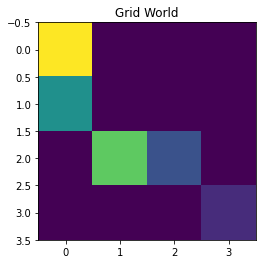

In [5]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()
env.render()

Random agent exploring deterministic environment.

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

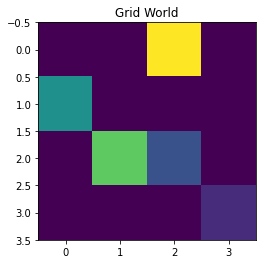

<IPython.core.display.Javascript object>

In [6]:
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()
while not done:
  action = agent.step(obs)
  reward, done = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

Random agent exploring stochastic environment.

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

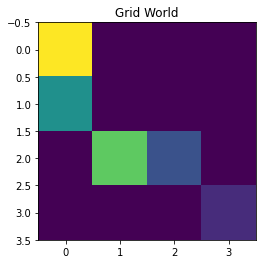

<IPython.core.display.Javascript object>

In [7]:
env = GridEnvironment(True)
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  reward, done = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)

## Smart Agent is defined using Q-Learning & SARSA

In [8]:
class SmartAgent():
    def __init__(self, env, alpha=0.2, gamma=0.9, isLearn = True):
      self.env = env
      self.q_table = dict()
      for i in range(4):
          for j in range(4):
              self.q_table[i,j] = {0:0, 1:0, 2:0, 3:0}
      self.epsilon = 0.3
      self.alpha = alpha
      self.gamma = gamma
      self.action_space = env.action_space
      self.isLearn = isLearn

    # This Method will return the action based on Q Table and epsilon greedy algorithm.
    def getAction(self, action_space):
      if np.random.uniform(0,1) < self.epsilon and self.isLearn:
          action = np.random.choice(self.action_space.n)
      else:
          curr_stst_q_val = self.q_table[tuple(self.env.agent_pos)]
          maxAct = max(curr_stst_q_val.values())
          action = np.random.choice([k for k, v in curr_stst_q_val.items() if v == maxAct])
      return action
    # This Method will update the Q table for Q-Learning.
    def updateQtableQL(self, old_state, reward, new_state, action):
      q_val = max((self.q_table[new_state]).values())
      self.q_table[old_state][action] = (1 - self.alpha) * self.q_table[old_state][action] \
      + self.alpha * (reward + self.gamma * q_val)
    # This Method will update the Q table for SARSA.
    def updateQtableSARSA(self, old_state, reward, new_state, action, next_action):
      q_val = self.q_table[new_state][next_action]
      self.q_table[old_state][action] = (1 - self.alpha) * self.q_table[old_state][action] \
      + self.alpha * (reward + self.gamma * q_val)

This Class Will Make the Agent Run and Learn based on differen tabular methods.

In [9]:
class RunAgent():
  def __init__(self, decay = 1):
    self.episode_rewards = []
    self.epsilon_decay = []
    self.decay = decay
  # This Method will amke the agent run based on Q-Learning.
  def runAgentQL(self, env, agent, episode):
    for i in range(episode):
        env.reset()
        done =False
        agent.epsilon = agent.epsilon*self.decay
        while not done:
            curr_state = tuple(env.agent_pos)
            action = agent.getAction(env.action_space)
            reward, done = env.step(action)
            agent.updateQtableQL(curr_state, reward, tuple(env.agent_pos), action)
        self.episode_rewards.append(reward)
        self.epsilon_decay.append(agent.epsilon)
    self.ploGraph()
    return self.episode_rewards

  # This Method will amke the agent run based on SARSA.
  def runAgentSARSA(self, env, agent, episode):
    for i in range(episode):
      env.reset()
      done =False
      action = agent.getAction(env.action_space)
      agent.epsilon = agent.epsilon*self.decay
      while not done:
        curr_state = tuple(env.agent_pos)
        reward, done = env.step(action)
        next_action = agent.getAction(env.action_space)
        agent.updateQtableSARSA(curr_state, reward, tuple(env.agent_pos), action,next_action)
        action = next_action
      self.episode_rewards.append(reward)
      self.epsilon_decay.append(agent.epsilon)
    self.ploGraph()
    return self.episode_rewards

  # This method will run the agent on updated Q-Table.
  def runTrainedAgent(self, env, agent, episode):
    episode_rewards = []
    for i in range(episode):
      env.reset()
      agent.isLearn = False
      done =False
      while not done:
        curr_state = tuple(env.agent_pos)
        action = agent.getAction(env.action_space)
        reward, done = env.step(action)
      episode_rewards.append(reward)
    plt.plot(episode_rewards)
    plt.title("Reward Per Episode")
    plt.xlabel("Number of Episodes")
    plt.ylabel("Reward")
    plt.show
  # This method will plot the graph.
  def ploGraph (self):
    figure, axis = plt.subplots(1,2,figsize=(15,5))
    axis[0].plot(self.episode_rewards)
    axis[0].set_title("Reward Per Episode")
    axis[0].set_xlabel("Number of Episodes")
    axis[0].set_ylabel("Reward")

    axis[1].plot(self.epsilon_decay)
    axis[1].set_title("Epsilon Decay")
    axis[1].set_xlabel("Number of Episodes")
    axis[1].set_ylabel("Epsilon")
    plt.show()

## Running Agent on Deterministic Environment

Train agent using Q-Learning.

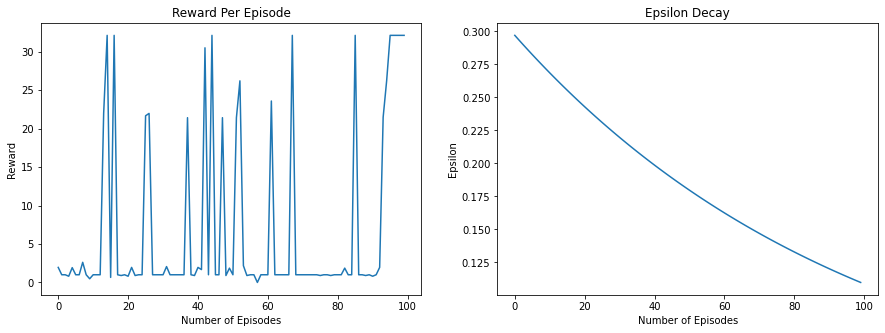

In [10]:
np.random.seed(10)
env = GridEnvironment()
agent = SmartAgent(env)
runAgent = RunAgent(0.99)
rewards_ql = runAgent.runAgentQL(env, agent ,100)

Running the agent to choose greedy action based on Q-Table.

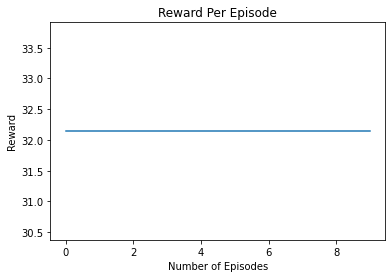

In [11]:
runAgent.runTrainedAgent(env, agent ,10)

Train agent using SARSA.

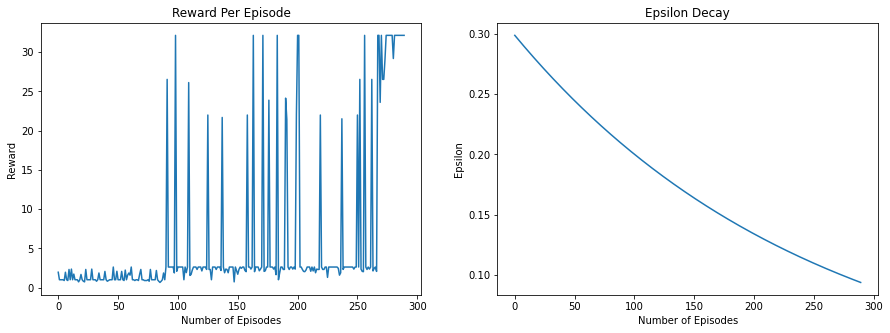

In [12]:
np.random.seed(10)
env = GridEnvironment()
agent = SmartAgent(env)
runAgent = RunAgent(0.996)
rewards_sarsa = runAgent.runAgentSARSA(env, agent ,290)

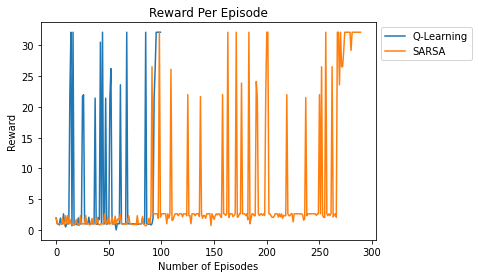

In [13]:
plt.plot(rewards_ql, label = "Q-Learning")
plt.plot(rewards_sarsa, label = "SARSA")
plt.title("Reward Per Episode")
plt.xlabel("Number of Episodes")
plt.ylabel("Reward")
plt.legend(bbox_to_anchor =(1, 1))
plt.show()

Running the agent to choose greedy action based on Q-Table.

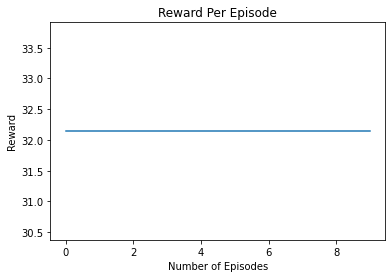

In [14]:
runAgent.runTrainedAgent(env, agent ,10)

## Running Agent on Stochastic Environment

Train agent uUsing Q-Learning.

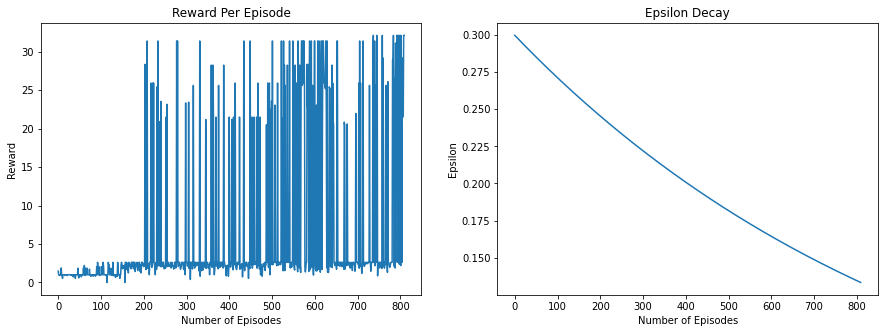

In [15]:
np.random.seed(10)
random.seed(10)
env = GridEnvironment(True)
agent = SmartAgent(env)
runAgent = RunAgent(0.999)
rewards_ql = runAgent.runAgentQL(env, agent ,810)

Running the agent to choose greedy action based on Q-Table.

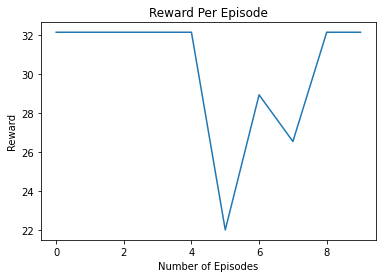

In [16]:
runAgent.runTrainedAgent(env, agent ,10)

Train agent using SARSA.

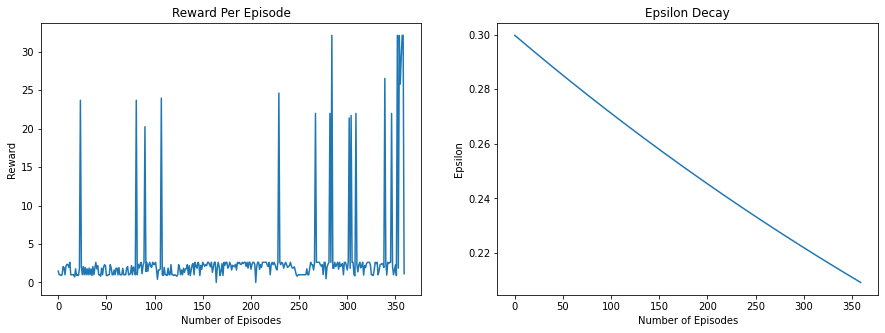

In [17]:
np.random.seed(10)
random.seed(10)
env = GridEnvironment(True)
agent = SmartAgent(env)
runAgent = RunAgent(0.999)
reward_sarsa = runAgent.runAgentSARSA(env, agent ,360)

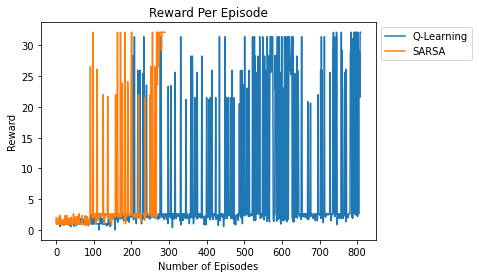

In [18]:
plt.plot(rewards_ql, label = "Q-Learning")
plt.plot(rewards_sarsa, label = "SARSA")
plt.title("Reward Per Episode")
plt.xlabel("Number of Episodes")
plt.ylabel("Reward")
plt.legend(bbox_to_anchor =(1, 1))
plt.show()

Running the agent to choose greedy action based on Q-Table.

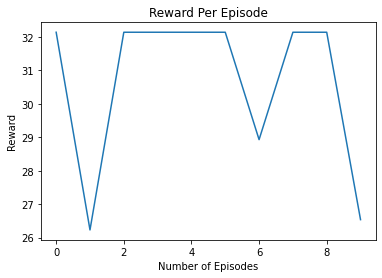

In [19]:
runAgent.runTrainedAgent(env, agent ,10)